In [447]:
import os
os.getcwd()

'/Users/chidam'

In [448]:
import pandas as pd
df=pd.read_csv('/Users/chidam/Desktop/housing_prices_kaggle_train.csv')

In [449]:
df.drop(df.index[[523,691,1182,1298, 1169]], inplace=True)
df=df.reset_index(drop=True)#here drop=True means to drop the alreading existing index column

In [450]:
len(df)

1455

In [451]:
df = df[(df.MSZoning != 'FV')]
df = df[df.MSZoning != 'C (all)']
df=df.reset_index(drop=True)

In [360]:
# df.drop(df.loc[df[(df['MSZoning']=='FV') | (df['MSZoning']=='C (all)')]], inplace=True)
# df=df.reset_index(drop=True)

In [330]:
# #Because the regulations are entirely different for houses in Commercial and Floating Village zones, planning to remove the records
# #involving those values from the dataset

# df=df.loc[(df['MSZoning']!='FV') & (df['MSZoning']!='C (all)')]

In [331]:
# to_drop = ['FV', 'C (all)']
# dfdf[~df['MSZoning'].isin(to_drop)]


In [452]:
len(df)

1380

In [453]:
df.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1375,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1376,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1377,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1378,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1379,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [271]:
# df.drop(df[(df['MSZoning']=='FV')].index, inplace=True)
# df=df.reset_index(drop=True)

In [272]:
# df.drop(df[(df['MSZoning']=='C (all)')].index, inplace=True)
# df=df.reset_index(drop=True)

In [454]:
df.columns[df.isnull().any()]

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [455]:
import calendar
df['MoSold'] = df['MoSold'].apply(lambda x: calendar.month_abbr[x])






In [456]:
df['Season']=df['MoSold'].copy()

In [457]:
df['Season'].isnull().any()

False

In [458]:
#To group months according to season: summer, winter, autumn, and spring

df.loc[(df['MoSold']=='Jun') | (df['MoSold']=='Jul') | (df['MoSold']=='Aug'),'Season']='Summer'
df.loc[(df['MoSold']=='Mar') | (df['MoSold']=='Apr') | (df['MoSold']=='May'),'Season']= 'Spring'
df.loc[(df['MoSold']=='Sep') | (df['MoSold']=='Oct') | (df['MoSold']=='Nov'),'Season']='Autumn'
df.loc[(df['MoSold']=='Jan') | (df['MoSold']=='Feb') | (df['MoSold']=='Dec'),'Season']='Winter'


In [459]:
df['Season'].value_counts()

Summer    577
Spring    428
Autumn    217
Winter    158
Name: Season, dtype: int64

In [460]:
df['Season'].isnull().any()

False

In [461]:
df['MoSold'].value_counts()

Jun    238
Jul    226
May    196
Apr    132
Aug    113
Mar    100
Oct     83
Nov     74
Sep     60
Dec     55
Jan     53
Feb     50
Name: MoSold, dtype: int64

In [91]:
#From 2006 to 2008 there was a steady decline in SalePrice, but optimistically rised from 2008 to 2009.
#Planning to frequency encode the seasonal changes. But first I am plaaning to use the seasons and see if there is a change.
#And then can try to introduce the positive and negative trends in SalePrice during the seasons




In [462]:
df['MSZoning'].value_counts()

RL    1146
RM     218
RH      16
Name: MSZoning, dtype: int64

In [463]:
df.groupby('YrSold')['MSZoning'].value_counts()

YrSold  MSZoning
2006    RL          245
        RM           50
        RH            3
2007    RL          259
        RM           45
        RH            6
2008    RL          231
        RM           53
        RH            3
2009    RL          270
        RM           47
        RH            4
2010    RL          141
        RM           23
Name: MSZoning, dtype: int64

In [464]:
#There is no clear pattern re whether the 2008 financial crisis was a major cause in affecting how home buyers chose which
#house to buy and in which neighborhood. Mostly Single-family Detached houses were sold in the low density residential zone 
# which offers more open space. Not sure whether it was super cheap to buy houses in such zones as it varies from place to place and therefore from 
# state to state. It could mean that we are dealing with completely different set of homebuyers who had money to buy house
# (may be the house prices were cheap and so home buyers took advantage of the situation)
# and as the matter of fact most of the sale conditions is normal

df.groupby('YrSold')['BldgType'].value_counts()

YrSold  BldgType
2006    1Fam        248
        TwnhsE       20
        Duplex       12
        2fmCon        9
        Twnhs         9
2007    1Fam        270
        TwnhsE       19
        Duplex       13
        2fmCon        4
        Twnhs         4
2008    1Fam        242
        TwnhsE       24
        2fmCon        8
        Duplex        7
        Twnhs         6
2009    1Fam        273
        TwnhsE       19
        Duplex       13
        Twnhs        12
        2fmCon        4
2010    1Fam        135
        TwnhsE       14
        Duplex        7
        2fmCon        5
        Twnhs         3
Name: BldgType, dtype: int64

In [465]:
#To group the neighborhoods according to maximum SalePrice

# df.loc[df['Neighborhood']<100000,'Neighborhood'] = len(df[df['Neighborhood']<100000])/len(df['Neighborhood_grouped'])




# dict(df.groupby('Neighborhood')['SalePrice'].max())


def neighborhood_convert(d):
    from collections import defaultdict
    d2=defaultdict(list)
    for k, v in d.items():
        if v<=200000:
            d2['g1'].append(k)     
        elif (v>200000) & (v<=300000):
            d2['g2'].append(k)
        elif (v>300000) & (v<=400000):
            d2['g3'].append(k)
        else:
            d2['g4'].append(k)
            
    return d2
            
            
        
            
    
    

In [466]:
neighborhood_convert(dict(df.groupby('Neighborhood')['SalePrice'].max()))

defaultdict(list,
            {'g1': ['IDOTRR',
              'NPkVill',
              'BrDale',
              'MeadowV',
              'SWISU',
              'Blueste',
              'Sawyer'],
             'g2': ['NWAmes', 'Mitchel', 'BrkSide', 'Blmngtn'],
             'g3': ['Gilbert',
              'SawyerW',
              'ClearCr',
              'Crawfor',
              'Timber',
              'Edwards',
              'NAmes',
              'Veenker'],
             'g4': ['CollgCr',
              'Somerst',
              'NoRidge',
              'NridgHt',
              'OldTown',
              'StoneBr']})

In [467]:
df.loc[(df['Neighborhood']=='IDOTRR'), 'Neighborhood']='g'

df.loc[(df['Neighborhood']=='MeadowV')|(df['Neighborhood']=='SWISU')|(df['Neighborhood']=='BrDale')|(df['Neighborhood']=='NPkVill')|(df['Neighborhood']=='Blueste')|(df['Neighborhood']=='Sawyer'),'Neighborhood']='g' 
    
df.loc[(df['Neighborhood']=='Blmngtn')|(df['Neighborhood']=='Mitchel')|(df['Neighborhood']=='BrkSide')|(df['Neighborhood']=='NWAmes'),'Neighborhood']='h' 

df.loc[(df['Neighborhood']=='Veenker')|(df['Neighborhood']=='SawyerW')|(df['Neighborhood']=='ClearCr')|(df['Neighborhood']=='Edwards')|(df['Neighborhood']=='Gilbert')|(df['Neighborhood']=='NAmes')|(df['Neighborhood']=='Timber')|(df['Neighborhood']=='Crawfor'),'Neighborhood']='i' 

df.loc[(df['Neighborhood']=='NoRidge')|(df['Neighborhood']=='NridgHt')|(df['Neighborhood']=='StoneBr')|(df['Neighborhood']=='OldTown')|(df['Neighborhood']=='Somerst')|(df['Neighborhood']=='CollgCr'),'Neighborhood']='j' 
         

In [468]:
df['Neighborhood'].unique()

array(['j', 'i', 'h', 'g'], dtype=object)

In [469]:
df['Neighborhood'].isnull().any()

False

In [470]:
df.groupby('GarageCars')['SalePrice'].max()

GarageCars
0    200500
1    266500
2    430000
3    611657
4    265979
Name: SalePrice, dtype: int64

In [471]:
df.groupby('SaleCondition')['SalePrice'].max()

SaleCondition
Abnorml    310000
AdjLand    127500
Alloca     359100
Family     259000
Normal     555000
Partial    611657
Name: SalePrice, dtype: int64

In [ ]:
#To convert the features: MSZoning, GarageType, 'GarageCars', 'GarageArea', 'SaleCondition', 'KitchenQual'




In [472]:
#Filling in the missing values in GarageType with BuiltIn as it is a popular choice but there are not many values from 
#that category
df.GarageType = df.GarageType.fillna('BuiltIn')

In [473]:
#BsmtQual

df['BsmtQual'].value_counts(dropna=False)

TA     639
Gd     561
Ex     108
NaN     37
Fa      35
Name: BsmtQual, dtype: int64

In [474]:
df.loc[df['BsmtQual'].isnull(), 'BsmtQual'] = 'missing'

In [475]:
df['BsmtQual'].value_counts(dropna=False)

TA         639
Gd         561
Ex         108
missing     37
Fa          35
Name: BsmtQual, dtype: int64

In [476]:
df.groupby('BsmtQual')['SalePrice'].median()

BsmtQual
Ex         318000
Fa         112000
Gd         192000
TA         136500
missing    101800
Name: SalePrice, dtype: int64

In [477]:
# Because the median SalePrice for the missing category is 101800 and is close to Fair median SalePrice I am converting missing 
# to Fa


df.loc[df['BsmtQual']=='missing', 'BsmtQual'] = 'Fa'



In [478]:
df['BsmtQual'].value_counts(dropna=False)

TA    639
Gd    561
Ex    108
Fa     72
Name: BsmtQual, dtype: int64

In [479]:
#To get value_counts() of 'MasVnrType'

df['MasVnrType'].value_counts(dropna=False)
        
        

None       815
BrkFace    430
Stone      115
BrkCmn      15
NaN          5
Name: MasVnrType, dtype: int64

In [480]:
df.loc[df['MasVnrType'].isnull(), 'MasVnrType'] = 'Stone'

In [481]:
df['MasVnrType'].value_counts(dropna=False)

None       815
BrkFace    430
Stone      120
BrkCmn      15
Name: MasVnrType, dtype: int64

In [482]:
df['Condition1'].value_counts(dropna=False)

Norm      1185
Feedr       78
Artery      48
RRAn        25
PosN        18
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64

In [483]:
dict(df['Condition1'].value_counts()/len(df))

{'Artery': 0.034782608695652174,
 'Feedr': 0.05652173913043478,
 'Norm': 0.8586956521739131,
 'PosA': 0.005797101449275362,
 'PosN': 0.013043478260869565,
 'RRAe': 0.007971014492753623,
 'RRAn': 0.018115942028985508,
 'RRNe': 0.0014492753623188406,
 'RRNn': 0.0036231884057971015}

In [484]:
df['Condition1'].isnull().any()

False

In [485]:
def convert_categorical(d, x, y, col_name):
    import pandas as pd
    for ele in range(len(x)):
        if (x[ele]=='RRNn') or (x[ele]=='RRNe'):
            if x[ele] in y:
                x[ele]=-y[x[ele]]
                
        else:
            if x[ele] in y:
                x[ele]=y[x[ele]]
        
    d.drop(col_name, axis=1)
    d[col_name]=pd.Series(x)
    return d[col_name].isnull().any()
    
convert_categorical(df, df['Condition1'].tolist(), dict(df['Condition1'].value_counts()/len(df)), 'Condition1')

False

In [486]:
df['Condition1'].tail()

1375    0.858696
1376    0.858696
1377    0.858696
1378    0.858696
1379    0.858696
Name: Condition1, dtype: float64

In [487]:
def convert_garagetype(d, x, y, col_name):
    import pandas as pd
    for ele in range(len(x)):
        if x[ele]=='Detchd':
            if x[ele] in y:
                x[ele]=-y[x[ele]]
                
        else:
            if x[ele] in y:
                x[ele]=y[x[ele]]
        
    d.drop(col_name, axis=1)
    d[col_name]=pd.Series(x)
    return d[col_name].head()

convert_garagetype(df, df['GarageType'].tolist(), dict(df['GarageType'].value_counts()/len(df)), 'GarageType')

0    0.598551
1    0.598551
2    0.598551
3   -0.260145
4    0.598551
Name: GarageType, dtype: float64

In [488]:
df['GarageType'].isnull().any()

False

In [ ]:
#24 columns
['LotArea', 'LotShape', 'Neighborhood', 'Condition1', 'HouseStyle',
       'MasVnrType', 'BsmtQual', 'TotalBsmtSF', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'FullBath', 'HalfBath', 'TotRmsAbvGrd',
       'GarageType', 'GarageArea', 'WoodDeckSF', 'MoSold', 'SaleType',
       'SalePrice', 'Age_building', 'Since_remodeled', 'Age_garage']

In [489]:
df.columns[df.isnull().any()]

Index(['LotFrontage', 'Alley', 'MasVnrArea', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu',
       'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC',
       'Fence', 'MiscFeature'],
      dtype='object')

In [490]:
#Convert 'MasVnrType' into numerical: None means no veneer type at all

def convert_MasVnrType(d, x, y, col_name):
    import pandas as pd
    for ele in range(len(x)):
        if x[ele]=='None':
            if x[ele] in y:
                x[ele]=-y[x[ele]]
                
        else:
            if x[ele] in y:
                x[ele]=y[x[ele]]
        
    d.drop(col_name, axis=1)
    d[col_name]=pd.Series(x)
    return d[col_name].head()

convert_MasVnrType(df, df['MasVnrType'].tolist(), dict(df['MasVnrType'].value_counts()/len(df)), 'MasVnrType')

0    0.311594
1   -0.590580
2    0.311594
3   -0.590580
4    0.311594
Name: MasVnrType, dtype: float64

In [491]:
df['MasVnrType'].isnull().any()

False

In [492]:
#Don't include SaleType instead include SaleCondition
def convert_SaleCondition(d, x, y, col_name):
    import pandas as pd
    for ele in range(len(x)):
        if x[ele]=='Abnorml':
            if x[ele] in y:
                x[ele]=-y[x[ele]]
                
        else:
            if x[ele] in y:
                x[ele]=y[x[ele]]
        
    d.drop(col_name, axis=1)
    d[col_name]=pd.Series(x)
    return d[col_name].head()

convert_SaleCondition(df, df['SaleCondition'].tolist(), dict(df['SaleCondition'].value_counts()/len(df)), 'SaleCondition')

0    0.835507
1    0.835507
2    0.835507
3   -0.065942
4    0.835507
Name: SaleCondition, dtype: float64

In [493]:
df['SaleCondition'].isnull().any()

False

In [494]:
#Since there is only one NaN value in the 'Electrical' column I am replacing it with the majority value 'SBrkr'
df.Electrical = df.Electrical.fillna('SBrkr')

In [495]:
#To find the age of a building by subtracting 'YearBuilt' from 'YrSold' 
df['Age_building']=(df['YrSold']-df['YearBuilt'])

In [496]:
#To find the number of years since a building had been remodeled before the time it was sold by subtracting 'YearRemodAdd' from
#'YrSold'
df['Since_remodeled']=(df['YrSold']-df['YearRemodAdd'])



In [497]:
#Filling in the missing values in 'GarageYrBlt'
df.GarageYrBlt = df.GarageYrBlt.fillna(df['GarageYrBlt'].median())

In [498]:
#GarageYrBlt Vs. SalePrice It is possible to get the info on whether the garage is a old one or recently built and thereby
#check how that had affected the SalePrice

#To find the age of a building by subtracting 'YearBuilt' from 'YrSold' 
df['Age_garage']=(df['YrSold']-df['GarageYrBlt'])

In [499]:
#To convert the categorical values in the column: 'Neighborhood', 'MasVnrType', 'MoSold', 
def convert_categorical(d, x, y, col_name):
    import pandas as pd
    for ele in range(len(x)):
        if x[ele] in y:
            x[ele]=y[x[ele]]

            
    d.drop(col_name, axis=1)
    d[col_name]=pd.Series(x)
    return d[col_name].head()

convert_categorical(df, df['KitchenQual'].tolist(), dict(df['KitchenQual'].value_counts()/len(df)), 'KitchenQual')

convert_categorical(df, df['HouseStyle'].tolist(), dict(df['HouseStyle'].value_counts()/len(df)), 'HouseStyle')

convert_categorical(df, df['BsmtQual'].tolist(), dict(df['BsmtQual'].value_counts()/len(df)), 'BsmtQual')

convert_categorical(df, df['Electrical'].tolist(), dict(df['Electrical'].value_counts()/len(df)), 'Electrical')

convert_categorical(df, df['MoSold'].tolist(), dict(df['MoSold'].value_counts()/len(df)), 'MoSold')

convert_categorical(df, df['Season'].tolist(), dict(df['Season'].value_counts()/len(df)), 'Season')

convert_categorical(df, df['Neighborhood'].tolist(), dict(df['Neighborhood'].value_counts()/len(df)), 'Neighborhood')

convert_categorical(df, df['MSZoning'].tolist(), dict(df['MSZoning'].value_counts()/len(df)), 'MSZoning')

convert_categorical(df, df['BldgType'].tolist(), dict(df['BldgType'].value_counts()/len(df)), 'BldgType')

convert_categorical(df, df['SaleType'].tolist(), dict(df['SaleType'].value_counts()/len(df)), 'SaleType')

0    0.881884
1    0.881884
2    0.881884
3    0.881884
4    0.881884
Name: SaleType, dtype: float64

In [ ]:
#24 columns
['LotArea', 'LotShape', 'Neighborhood', 'Condition1', 'HouseStyle',
       'MasVnrType', 'BsmtQual', 'TotalBsmtSF', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'FullBath', 'HalfBath', 'TotRmsAbvGrd',
       'GarageType', 'GarageArea', 'WoodDeckSF', 'MoSold', 'SaleType',
       'SalePrice', 'Age_building', 'Since_remodeled', 'Age_garage']

In [500]:
df.columns[df.isnull().any()]

Index(['LotFrontage', 'Alley', 'MasVnrArea', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageFinish',
       'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature'],
      dtype='object')

In [ ]:
['LotArea', 'Neighborhood', 'Condition1','GarageCars','MasVnrType', 'BsmtQual', 'TotalBsmtSF', 'Electrical', '1stFlrSF','2ndFlrSF', 'GrLivArea', 'FullBath', 'HalfBath', 'TotRmsAbvGrd','GarageType', 'GarageArea', 'WoodDeckSF', 'MoSold', 'SaleType','SaleCondition','Age_building', 'Since_remodeled', 'Age_garage', 'BldgType', 'MSZoning', 'Season', 'KitchenQual', 'SalePrice']

In [501]:
cols = [col for col in df.columns if col in ['LotArea', 'Neighborhood', 'Condition1','GarageCars','MasVnrType', 'BsmtQual', 'TotalBsmtSF', 'Electrical', '1stFlrSF','2ndFlrSF', 'GrLivArea', 'FullBath', 'HalfBath', 'TotRmsAbvGrd','GarageType', 'GarageArea', 'WoodDeckSF', 'MoSold', 'SaleType','SaleCondition','Age_building', 'Since_remodeled', 'Age_garage', 'BldgType', 'MSZoning', 'Season', 'KitchenQual', 'SalePrice']]
df4 = df[cols]


In [502]:
len(df4.columns)

28

In [503]:
y=df4['SalePrice'].values


In [504]:
df4=df4.drop('SalePrice', axis=1)

X=df4.values





In [505]:
from sklearn.ensemble import RandomForestRegressor
RFR4 = RandomForestRegressor(random_state=42)





In [506]:
#GridSearchCV

from sklearn.model_selection import GridSearchCV

parameters ={'n_estimators':[100, 150, 200, 250], 'min_samples_split':[2, 3, 4, 5], 'min_samples_leaf':[1, 2, 3], 'max_features':[7, 8, 9, 10]}

In [507]:
clf_rfr4 = GridSearchCV(RFR4, parameters, cv=10)

In [508]:
#ran at 3:04 and end at 3:32
clf_rfr4.fit(X, y)

GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'min_samples_leaf': [1, 2, 3], 'n_estimators': [100, 150, 200, 250], 'max_features': [7, 8, 9, 10], 'min_samples_split': [2, 3, 4, 5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [509]:
clf_rfr4.best_params_

{'max_features': 10,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

In [510]:
clf_rfr4.best_score_

0.8646560158977916

In [512]:
from sklearn.ensemble import RandomForestRegressor
RFR_model4 = RandomForestRegressor(n_estimators=200, max_features=10, min_samples_leaf= 1, min_samples_split= 2, random_state=42, oob_score=True)



In [513]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [514]:
rfr_fit4=RFR_model4.fit(X_train, y_train)

In [515]:
rfr_fit4.score(X_test, y_test)

0.8448277913405189

In [546]:
#Second Version
#Remove Electrical and Condition1

cols1 = [col for col in df.columns if col in ['LotArea', 'Neighborhood', 'GarageCars','MasVnrType', 'BsmtQual', 'TotalBsmtSF', '1stFlrSF','2ndFlrSF', 'GrLivArea', 'FullBath', 'HalfBath', 'TotRmsAbvGrd','GarageType', 'GarageArea', 'WoodDeckSF', 'MoSold', 'SaleType','SaleCondition','Age_building', 'Since_remodeled', 'Age_garage', 'BldgType', 'MSZoning', 'Season', 'KitchenQual', 'SalePrice']]
df5 = df[cols1]


y5=df5['SalePrice'].values
df5=df5.drop('SalePrice', axis=1)

X5=df5.values





In [548]:
RFR5 = RandomForestRegressor(random_state=42)
parameters5 ={'n_estimators':[100, 150, 200, 250], 'min_samples_split':[2, 3, 4, 5], 'min_samples_leaf':[1, 2, 3], 'max_features':[8, 9, 10, 11]}
clf_rfr5 = GridSearchCV(RFR5, parameters5, cv=10)

In [549]:
clf_rfr5.fit(X5, y5)#run at 4:46

GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'min_samples_leaf': [1, 2, 3], 'n_estimators': [100, 150, 200, 250], 'max_features': [8, 9, 10, 11], 'min_samples_split': [2, 3, 4, 5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [550]:
clf_rfr5.best_score_

0.86536012653269

In [551]:
clf_rfr5.best_params_

{'max_features': 8,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 200}

In [526]:
from sklearn.ensemble import RandomForestRegressor
RFR_model5 = RandomForestRegressor(n_estimators=200, max_features=10, min_samples_leaf= 1, min_samples_split= 2, random_state=42, oob_score=True)




In [527]:
X_train5, X_test5, y_train5, y_test5 = train_test_split(X5, y5, test_size=0.20, random_state=42)

In [528]:
rfr_fit5=RFR_model5.fit(X_train5, y_train5)

In [529]:
rfr_fit5.score(X_test5, y_test5)

0.8470888633094419

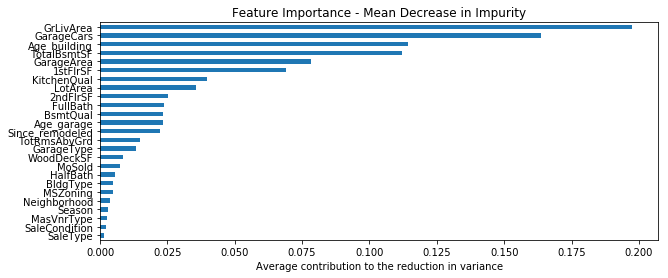

In [530]:
fs = pd.Series(RFR_model5.feature_importances_, index=df5.columns.values)
feature_scores = fs.sort_values()
ax = feature_scores.plot(kind='barh', figsize=(10,4))
ax.set_title("Feature Importance - Mean Decrease in Impurity")
ax.set_xlabel('Average contribution to the reduction in variance');

In [535]:
#Just going to have the 24 columns that I started out with the first time and add a few columns

cols2 = [col for col in df.columns if col in ['LotArea', 'Neighborhood', 'Condition1', 'HouseStyle','MasVnrType', 'BsmtQual', 'TotalBsmtSF', 'Electrical', '1stFlrSF','2ndFlrSF', 'GrLivArea', 'FullBath', 'HalfBath', 'TotRmsAbvGrd','GarageType', 'GarageArea', 'WoodDeckSF', 'MoSold', 'SaleType','SalePrice', 'Age_building', 'Since_remodeled', 'Age_garage']]

df6 = df[cols2]


y6=df6['SalePrice'].values
df6=df6.drop('SalePrice', axis=1)

X6=df6.values






In [542]:
parameters6 ={'n_estimators':[100, 150, 200, 250], 'min_samples_split':[2, 3, 4, 5], 'min_samples_leaf':[1, 2, 3], 'max_features':[6, 7, 8, 9]}

In [543]:
RFR6 = RandomForestRegressor(random_state=42, oob_score=True)

In [544]:
clf_rfr6 = GridSearchCV(RFR6, parameters6, cv=10)

In [536]:
RFR_model6 = RandomForestRegressor(n_estimators=200, max_features=10, min_samples_leaf= 1, min_samples_split= 2, random_state=42, oob_score=True)



In [537]:
X_train6, X_test6, y_train6, y_test6 = train_test_split(X6, y6, test_size=0.20, random_state=42)

In [538]:
rfr_fit6=RFR_model6.fit(X_train6, y_train6)

In [539]:
rfr_fit6.score(X_test6, y_test6)

0.8292435251563409